# Data Exploration

My objective of this visualization is to provide an intuitive perception of how the wages of employees (maybe more interested in Information Technology related fields) have been changing over time. The dataset that I will depend on will (primary) be **National Employment, Hours, and Earnings** [(link to Kaggle)](https://www.kaggle.com/bls/employment#ce.series.csv) provided by _Current Employment Statistics (CES)_.

For the purpose of the visualization, I would have to explore around the data, understand the dataset. This notebook exposes these steps...

In [1]:
import requests
import os

def download_ce(filename, dst='./ce_data/'):
    """
    Download from https://download.bls.gov/pub/time.series/ce/
    """
    url = f'https://download.bls.gov/pub/time.series/ce/{filename}'
    
    print('downloading from', url)
    r = requests.get(url)
    f = dst+filename
    print('save to', f)
    
    raw = r.content #.decode().replace('\t', ' ')
    open(f, 'wb').write(raw)
    
import pandas as pd
def load_ce(filename, dst='./ce_data/', force_download=False):
    """
    Load ce file as DataFrame, if not exist, download from ce
    """
    f = dst+filename
    if force_download or not os.path.exists(f):
        download_ce(filename, dst)
   
    # return open(f, 'r').read()
    # return f
    return pd.read_csv(f, sep=r'\s*\t\s*', engine='python')

In [2]:
%mkdir ce_data
open('ce_data/touch', 'w').write('');

mkdir: ce_data: File exists


In [3]:
df_50a = load_ce('ce.data.50a.Information.Employment', force_download=True)
df_50a.head()

downloading from https://download.bls.gov/pub/time.series/ce/ce.data.50a.Information.Employment
save to ./ce_data/ce.data.50a.Information.Employment


,series_id,year,period,value,footnote_codes
0,CES5000000001,1939,M01,1112.0,None
1,CES5000000001,1939,M02,1118.0,None
2,CES5000000001,1939,M03,1126.0,None
3,CES5000000001,1939,M04,1127.0,None
4,CES5000000001,1939,M05,1125.0,None


In [4]:
df_50b = load_ce('ce.data.50b.Information.AllEmployeeHoursAndEarnings')
df_50b.head()

,series_id,year,period,value,footnote_codes
0,CES5000000002,2006,M03,36.4,None
1,CES5000000002,2006,M04,36.4,None
2,CES5000000002,2006,M05,36.5,None
3,CES5000000002,2006,M06,36.5,None
4,CES5000000002,2006,M07,36.4,None


In [5]:
df_50b.year.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [6]:
df_50c = load_ce('ce.data.50c.Information.ProductionEmployeeHoursAndEarnings')
df_50c.head()

,series_id,year,period,value,footnote_codes
0,CES5000000007,1964,M01,38.0,None
1,CES5000000007,1964,M02,37.9,None
2,CES5000000007,1964,M03,38.1,None
3,CES5000000007,1964,M04,38.3,None
4,CES5000000007,1964,M05,38.2,None


In [7]:
df_50c[ df_50c['year'] == 1964 ].series_id.unique()

array(['CES5000000007', 'CES5000000008', 'CES5000000030', 'CES5000000031',
       'CES5000000032', 'CES5000000034', 'CES5000000035', 'CES5000000081',
       'CES5000000082', 'CEU5000000007', 'CEU5000000008', 'CEU5000000030',
       'CEU5000000031', 'CEU5000000032', 'CEU5000000034', 'CEU5000000035',
       'CEU5000000081', 'CEU5000000082'], dtype=object)

**Alright... But what're the meanings of these `CES5000000032` ids?**

In [8]:
_df_series = load_ce('ce.series')
def get_meaning_series(series_id):
    return _df_series[ _df_series['series_id'] == series_id ]

In [9]:
get_meaning_series('CES5000000007')

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
7364,CES5000000007,50,50000000,7,S,Average weekly hours of production and nonsupe...,1964,M01,2019,M09,None


**And `supersector_code`? `industry_code`? `data_type_code`?**

In [10]:
_df_supersector = load_ce('ce.supersector')
_df_industry = load_ce('ce.industry')
_df_datatype = load_ce('ce.datatype')

def get_meaning_supersector(code):
    return _df_supersector[ _df_supersector['supersector_code'] == code ].supersector_name.iloc[0]
def get_meaning_industry(code):
    return _df_industry[ _df_industry['industry_code'] == code ]
def get_meaning_datatype(code):
    return _df_datatype[ _df_datatype['data_type_code'] == code ]

In [11]:
arr = df_50c[ df_50c['year'] == 1964 ].series_id.unique()
print('len', len(arr))
arr

len 18


array(['CES5000000007', 'CES5000000008', 'CES5000000030', 'CES5000000031',
       'CES5000000032', 'CES5000000034', 'CES5000000035', 'CES5000000081',
       'CES5000000082', 'CEU5000000007', 'CEU5000000008', 'CEU5000000030',
       'CEU5000000031', 'CEU5000000032', 'CEU5000000034', 'CEU5000000035',
       'CEU5000000081', 'CEU5000000082'], dtype=object)

In [12]:
arr = df_50c[ df_50c['year'] == 2018 ].series_id.unique()
print('len', len(arr))
arr[:30]

len 234


array(['CES5000000007', 'CES5000000008', 'CES5000000030', 'CES5000000031',
       'CES5000000032', 'CES5000000034', 'CES5000000035', 'CES5000000081',
       'CES5000000082', 'CES5051100007', 'CES5051100008', 'CES5051100030',
       'CES5051100031', 'CES5051100032', 'CES5051100034', 'CES5051100035',
       'CES5051100081', 'CES5051100082', 'CES5051110007', 'CES5051110008',
       'CES5051110030', 'CES5051110031', 'CES5051110032', 'CES5051110034',
       'CES5051110035', 'CES5051110081', 'CES5051110082', 'CES5051111007',
       'CES5051111008', 'CES5051111030'], dtype=object)

**Interesting, looks like there're new `series` gained over time**

In [13]:
df = get_meaning_series(arr[15])
df

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
7397,CES5051100035,50,50511000,35,S,Indexes of aggregate weekly payrolls of produc...,I,2003,M01,2019,M08


In [14]:
print(df.industry_code.iloc[0])
get_meaning_industry(df.industry_code.iloc[0]) 

50511000


,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
520,50511000,511,A,"Publishing industries, except Internet",4,T,521


In [15]:
print(df.data_type_code.iloc[0])
get_meaning_datatype(df.data_type_code.iloc[0])

35


,data_type_code,data_type_text
28,35,INDEXES OF AGGREGATE WEEKLY PAYROLLS OF PRODUC...


In [16]:
print(df.supersector_code.iloc[0])
get_meaning_supersector(df.supersector_code.iloc[0]) 

50


'Information'

## 2. Find Data of Interest

Looks like `ce.series` contains interesting stuff which allows me to find value (indexed by `series_id`) filtered with supersector, industry type, time span and etc. Should be a good start.

But to begin with, I would first like to know what are some `industries` in the `Information` supersector.

In [17]:
arr = df_50c[ df_50c['year'] == 2019 ].series_id.unique()
len(arr)

234

In [18]:
df = pd.concat([(get_meaning_series(s)) for s in arr[1:]])
df.head(3)

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
7365,CES5000000008,50,50000000,8,S,Average hourly earnings of production and nons...,1964,M01,2019,M09,None
7372,CES5000000030,50,50000000,30,S,Average weekly earnings of production and nons...,1964,M01,2019,M09,None
7373,CES5000000031,50,50000000,31,S,Average weekly earnings of production and nons...,1964,M01,2019,M09,None


In [19]:
df.industry_code.unique()

array([50000000, 50511000, 50511100, 50511110, 50511120, 50511200,
       50512000, 50515000, 50515110, 50517000, 50517300, 50518000,
       50519000])

In [20]:
df_industries_2019 = pd.concat([get_meaning_industry(i) for i in df.industry_code.unique()])
print(len(df_industries_2019))
df_industries_2019

13


,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
519,50000000,51,A,Information,2,T,520
520,50511000,511,A,"Publishing industries, except Internet",4,T,521
521,50511100,5111,A,"Newspaper, book, and directory publishers",5,T,522
522,50511110,51111,A,Newspaper publishers,6,T,523
523,50511120,51112,A,Periodical publishers,6,T,524
526,50511200,5112,A,Software publishers,5,T,527
527,50512000,512,A,Motion picture and sound recording industries,4,T,528
530,50515000,515,A,"Broadcasting, except Internet",4,T,531
532,50515110,51511,A,Radio broadcasting,6,T,533
535,50517000,517,A,Telecommunications,4,T,536


Or, find all the industry that has ever existed in the supersection 50 (Information)

In [21]:
_df_series.head(3)

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
0,CES0000000001,0,0,1,S,"All employees, thousands, total nonfarm, seaso...",1939,M01,2019,M09,None
1,CES0000000010,0,0,10,S,"Women employees, thousands, total nonfarm, sea...",1964,M01,2019,M09,None
2,CES0000000025,0,0,25,S,"All employees, quarterly averages, seasonally ...",1939,M03,2019,M09,None


In [22]:
arr = _df_series[ _df_series.supersector_code == 50 ].industry_code.unique()
arr

array([50000000, 50511000, 50511100, 50511110, 50511120, 50511130,
       50511190, 50511200, 50512000, 50512110, 50512130, 50515000,
       50515100, 50515110, 50515120, 50515200, 50517000, 50517300,
       50517311, 50517312, 50517900, 50517911, 50518000, 50519000,
       50519130, 50519190])

In [23]:
df_industries_all = pd.concat([get_meaning_industry(i) for i in arr])
print(len(df_industries_all))
df_industries_all

26


,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
519,50000000,51,A,Information,2,T,520
520,50511000,511,A,"Publishing industries, except Internet",4,T,521
521,50511100,5111,A,"Newspaper, book, and directory publishers",5,T,522
522,50511110,51111,A,Newspaper publishers,6,T,523
523,50511120,51112,A,Periodical publishers,6,T,524
524,50511130,51113,E,Book publishers,6,T,525
525,50511190,"51114,9",C,"Directory, mailing list, and other publishers",6,T,526
526,50511200,5112,A,Software publishers,5,T,527
527,50512000,512,A,Motion picture and sound recording industries,4,T,528
528,50512110,51211,C,Motion picture and video production,6,T,529


In [24]:
print(f"There's {len(df_industries_all) - len(df_industries_2019)} industries not in the 2019 stats.")

There's 13 industries not in the 2019 stats.


**OK, with all these industies in the Infomation supersector, what kind of data we have from the whole dataset provide?**

According to the `ce.txt`:

          

          a - Employment - includes all employment datatypes                                 
                      (Datatype codes shown in parentheses):                                  

                  *  All employees (01)                                                       
                  *  Production or nonsupervisory employees (06)                              
                  *  Women employees (10)                                                     
                  *  1-month diffusion index (21)                                             
                  *  3-month diffusion index (22)                                             
                  *  6-month diffusion index (23)                                             
                  *  12-month diffusion index (24)                                            
                  *  All employee quarterly average (25)                                      
                  *  3-month moving average change (26)                                       

           b - Hours and earnings of all employees - includes all hours and earnings          
                     datatypes for all employee payroll: (Data type numbers shown in          
                     parentheses)                                                             

                  *  Average weekly hours for all employees (02)                              
                  *  Average hourly earnings for all employees (03)                           
                  *  Average overtime hours of all employees (04)                             
                  *  Average weekly earnings of all employees (11)                            
                  *  Average weekly earnings of all employees $82-84 (12)                  
                  *  Average hourly earnings of all employees $82-84 (13)                     
                  *  Average hourly earnings of all employees excluding overtime (15)         
                  *  Index of aggregate weekly hours of all employees, 2007=100 (16)          
                  *  Index of aggregate weekly payrolls of all employees, 2007=100 (17)       
                  *  Quarterly average weekly hours of all employees (19)                     
                  *  Quarterly average weekly overtime hours of all employees (20)            
                  *  Aggregate weekly hours of all employees (56)                             
                  *  Aggregate weekly payrolls of all employees (57)                          
                  *  Aggregate weekly overtime hours of all employees (58)                    

            c - Production employee hours and earnings - includes all hours and               
                     earnings data types for production or nonsupervisory                     
                     employees: (Data type numbers shown in parentheses)                      

                  *  Average weekly hours for production employees (07)                       
                  *  Average hourly earnings for production employees (08)                    
                  *  Average weekly overtime hours of production employees (09)               
                  *  Average weekly earnings of production employees (30)                     
                  *  Average weekly earnings of production employees, $82-84 (31)             
                  *  Average hourly earnings of production employees, $82-84 (32)             
                  *  Average hourly earnings of production employees excluding                
                     overtime (33)                                                            
                  *  Index of aggregate hours of production employees, 2002=100 (34)          
                  *  Index of aggregate payrolls of production employees, 2002=100 (35)       
                  *  Quarterly average weekly hours of production employees  (36)             
                  *  Quarterly average weekly overtime hours of production                    
                     employees (37)                                                           
                  *  Aggregate weekly hours of production employees (81)                      
                  *  Aggregate weekly payrolls of production employees (82)                   
                  *  Aggregate weekly overtime hours of production employees (83)  
                  
             

**Let's see the employee numbers of all time**

Which is `data_type_code == 01`

In [25]:
df_50a.head()

,series_id,year,period,value,footnote_codes
0,CES5000000001,1939,M01,1112.0,None
1,CES5000000001,1939,M02,1118.0,None
2,CES5000000001,1939,M03,1126.0,None
3,CES5000000001,1939,M04,1127.0,None
4,CES5000000001,1939,M05,1125.0,None


In [26]:
df_series = pd.concat([get_meaning_series(i) for i in df_50a.series_id.unique()])
# filter where the data_type_code is 01
df_series_filtered = df_series[ df_series.data_type_code == 1 ]
# industry_code == 50511200, Software publishers
df_series_filtered = df_series_filtered[ df_series_filtered.industry_code == 50511200 ]
df_series_filtered.head()

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
7477,CES5051120001,50,50511200,1,S,"All employees, thousands, software publishers,...",I,1990,M01,2019,M08
20483,CEU5051120001,50,50511200,1,U,"All employees, thousands, software publishers,...",1990,M01,2019,M08,None


In [27]:
df_value = df_50a[ df_50a.series_id.isin(df_series_filtered.series_id) ]
print(len(df_value), len(df_50a))

741 47430


In [28]:
# Drop 2019 data (because the we have incomplete data on 2019)
df_value = df_value[ df_value.year < 2019 ]
df_value.tail()

,series_id,year,period,value,footnote_codes
31716,CEU5051120001,2018,M09,415.2,None
31717,CEU5051120001,2018,M10,413.9,None
31718,CEU5051120001,2018,M11,417.8,None
31719,CEU5051120001,2018,M12,417.9,None
31720,CEU5051120001,2018,M13,407.9,None


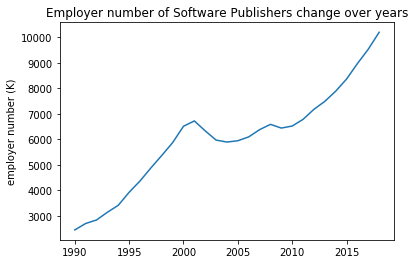

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df_value.groupby('year').agg('sum'))
plt.title('Employer number of Software Publishers change over years')
plt.ylabel('employer number (K)')
plt.show()

## Wrap Some Handy Functions

At this point, I guess it's a good time to make some common step. So that I can dig more upon what we have here.

### 3.1 Show Involved Industries from Series

In [30]:
def get_included_industries(series_ids):
    _df = pd.concat([get_meaning_series(i) for i in series_ids])
    return pd.concat([get_meaning_industry(i) for i in _df.industry_code.unique()])

In [31]:
get_included_industries(load_ce('ce.data.10a.MiningAndLogging.Employment').series_id.unique())

,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
5,10000000,-,A,Mining and logging,2,T,6
6,10113300,1133,A,Logging,5,T,7
7,10210000,21,A,Mining,3,T,8
8,10211000,211,A,Oil and gas extraction,4,T,9
9,10212000,212,A,"Mining, except oil and gas",4,T,10
10,10212100,2121,A,Coal mining,5,T,11
11,10212111,212111,C,Bituminous coal and lignite surface mining,7,T,12
12,10212113,"212112,3",C,Bituminous coal underground mining and anthrac...,7,T,13
13,10212200,2122,E,Metal ore mining,5,T,14
14,10212300,2123,E,Nonmetallic mineral mining and quarrying,5,T,15


In [32]:
get_included_industries(load_ce('ce.data.20a.Construction.Employment').series_id.unique())

,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
23,20000000,23,A,Construction,2,T,24
24,20236000,236,A,Construction of buildings,4,T,25
25,20236100,2361,A,Residential building,5,T,26
26,20236115,236115,A,New single-family general contractors,7,T,27
27,20236116,236116,B,New multifamily general contractors,7,T,28
28,20236117,236117,B,New housing operative builders,7,T,29
29,20236118,236118,A,Residential remodelers,7,T,30
30,20236200,2362,A,Nonresidential building,5,T,31
31,20236210,23621,A,Industrial building,6,T,32
32,20236220,23622,A,Commercial building,6,T,33


### 3.2 Filters from Series, `data_type`, `industry_code`

e.g. 

**Industry**: Coal mining (`industry_code = 10212100`)

**Interested Data**: Average hourly earnings for production employees (`data_type_code == 08`)                                             

In [33]:
def filter_datatype_from_seriesids(datatype_code, series_ids):
    _df = pd.concat([get_meaning_series(i) for i in series_ids])
    return _df[ _df.data_type_code == datatype_code ].series_id.to_list()

def filter_industry_from_seriesids(industry_code, series_ids):
    _df = pd.concat([get_meaning_series(i) for i in series_ids])
    return _df[ _df.industry_code == industry_code ].series_id.to_list()

In [34]:
df_30c = load_ce('ce.data.10c.MiningAndLogging.ProductionEmployeeHoursAndEarnings')
arr_s = df_30c.series_id.unique()
arr_s = filter_datatype_from_seriesids(8, arr_s)
arr_s = filter_industry_from_seriesids(10212100, arr_s)
df_30c[ df_30c.series_id.isin(arr_s) ].head()

,series_id,year,period,value,footnote_codes
27881,CES1021210008,1985,M01,16.53,None
27882,CES1021210008,1985,M02,16.84,None
27883,CES1021210008,1985,M03,16.84,None
27884,CES1021210008,1985,M04,16.90,None
27885,CES1021210008,1985,M05,16.82,None


**Plot every industry as a single line, still use `data_type==8`**

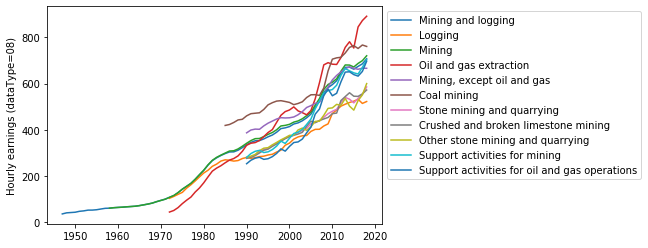

In [35]:
# Example: Plot every industry as a single line, still use data_type==8
%matplotlib inline

arr_s = df_30c.series_id.unique()
arr_filtered = filter_datatype_from_seriesids(8, arr_s)

industries_map = {}
industries_list = get_included_industries(df_30c.series_id.unique()).industry_code.to_list()
industries_names = [get_meaning_industry(i).industry_name.iloc[0] for i in industries_list]

for industry_code in industries_list:
    # print(industry_code)
    arr_s = filter_industry_from_seriesids(industry_code, arr_filtered)
    df = df_30c[ df_30c.series_id.isin(arr_s) ]
    # Drop incomplete stats
    df = df[ df.year<2019 ]
    industries_map[industry_code] = df.groupby('year').agg('sum')
    
    # Multiple line plot
    plt.plot(
        industries_map[industry_code].index, 
        industries_map[industry_code].value,
        #marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4
    )

plt.legend(industries_names, bbox_to_anchor=(1, 1))
plt.ylabel('Hourly earnings (dataType=08)')
plt.show()